In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('datos.xlsx')

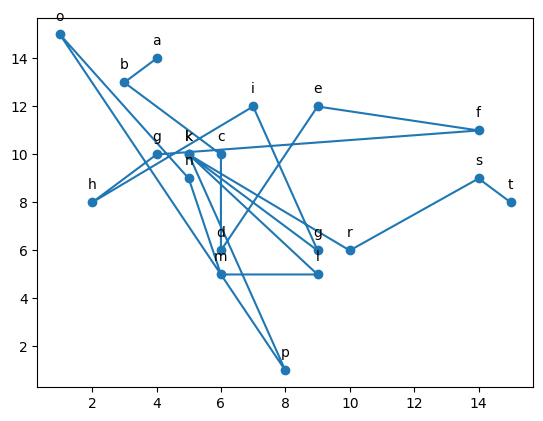

In [5]:
plt.plot(df['x'], df['y'], marker='o', linestyle='-')

for i, txt in enumerate(df['punto']):
    plt.annotate(txt, (df['x'][i], df['y'][i]), textcoords='offset points', xytext=(0,10), ha='center')

### Ejemplo iloc

In [8]:
df.iloc[0]

x         4
y        14
punto     a
Name: 0, dtype: object

### Distancia euclidiana

![distancia](formula-ed.jpeg)

In [40]:
print(df.iloc[0,0], df.iloc[1,0])

4 3


In [15]:
np.sqrt((df.iloc[0,0] - df.iloc[1,0])**2 + (df.iloc[0,1] - df.iloc[1,1])**2)

1.4142135623730951

In [11]:
def euclidean_distance(x1, x2, y1, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)

### Distancia Total

In [16]:
len(df)

20

In [19]:
df['x'].iloc[19]

15

In [20]:
distance = 0
for i in range(len(df)):
    if i + 1 >= len(df):
        break
    distance += euclidean_distance(df['x'].iloc[i], df['x'].iloc[i + 1], df['y'].iloc[i], df['y'].iloc[i+1])
distance

111.4208932855017

In [5]:
def total_distance(df):
    distance = 0
    for idx in range(0, len(df)):
        if idx + 1 >= len(df):
            break
        distance += euclidean_distance(df['x'].loc[idx], df['x'].loc[idx+1], df['y'].loc[idx], df['y'].loc[idx+1] )
    return distance

### Nueva Solución

In [25]:
list_test = range(1, len(df) - 1)
list_test[-1]

18

In [35]:
rand_value_1 = random.randint(list_test[0], list_test[-1])
rand_value_2 = random.randint(list_test[0], list_test[-1])
print(rand_value_1, rand_value_2)

13 8


In [36]:
df.iloc[rand_value_1]

x        5
y        9
punto    n
Name: 13, dtype: object

In [37]:
df_new = df.copy()
df_new.iloc[rand_value_1], df_new.iloc[rand_value_2] = df_new.iloc[rand_value_2].copy(), df_new.iloc[rand_value_1].copy()
df_new

,x,y,punto
0,4,14,a
1,3,13,b
2,6,10,c
3,6,6,d
4,9,12,e
5,14,11,f
6,4,10,g
7,2,8,h
8,5,9,n
9,9,6,g


In [38]:
def swap_elements(df):
    df_new = df.copy()
    swap_list_indx = range(1, len(df) - 1)

    i = random.randint(swap_list_indx[0], swap_list_indx[-1])
    j = random.randint(swap_list_indx[0], swap_list_indx[-1])

    if i == j:
        while i == j:
            j = random.randint(swap_list_indx[0], swap_list_indx[-1])
    
    df_new.iloc[i], df_new.iloc[j] = df_new.iloc[j].copy(), df_new.iloc[i].copy()

    return df_new

### Metaheuristica: Recocido Simulado

![imagen|100](flujo.png)

In [ ]:
def cooling_temp(gamma, temp):
    return gamma * temp

In [ ]:
def check_accept(temp, new_solution, current_solution):
    prob = min(1, np.exp(-(new_solution - current_solution) / temp))
    if prob > random.uniform(0, 1):
        return True
    else:
        return False

In [ ]:
def run(iterations, temp, df, gamma):
    scores = []
    best_scores = []
    temps = []

    current = total_distance(df)
    best = total_distance(df)

    for _ in range(iterations):
        # swap cities
        df_new = swap_elements(df)

        # calculate new distance
        new = total_distance(df_new)
        scores.append(new)

        # log if this new one is the best we've seen
        if new < best:
            best_df = df_new.copy()
            best = new.copy()
        best_scores.append(best)

        # stay or transition from state
        if check_accept(temp, new, current):
            df = df_new.copy()
            current = new.copy()

        # update temperature
        temps.append(temp)
        temp = cooling_temp(gamma, temp)

    return scores, best_scores, temps, best_df